<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/2024/Caso_36_Regresion_lineal_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Evaluar y realizar predicciones con un modelo de regresi√≥n lineal simple.





# Descripci√≥n

* Cargar librerias
* Cargar funciones
* Cargar datos
* Construir modelo de regresi√≥n lineal simple
* Evaluar modelo con *root mean squared error RMSE*.
* Hacer predicciones
* Interpretar el caso

# Fundamento te√≥rico

La regresi√≥n lineal simple implica aplicar una ecuaci√≥n matem√°tica de m√≠nimos cuadrados que permite pronosticar o predecir el valor de una variable con base en el valor de otra; este procedimiento se llama an√°lisis de regresi√≥n.

El an√°lisis de regresi√≥n es un m√©todo para examinar una relaci√≥n lineal entre dos variables; se utiliza el concepto de correlaci√≥n r
, sin embargo, la regresi√≥n proporciona mucho m√°s informaci√≥n, adem√°s de permitir estimaciones o predicciones de la relaci√≥n lineal con la ecuaci√≥n de m√≠nimos cuadrados (Lind, Marchal, and Wathen 2015).

De auerdo a chat gpt: La regresi√≥n lineal simple es un m√©todo estad√≠stico utilizado para modelar la relaci√≥n entre dos variables: una independiente (predictora) y una dependiente (respuesta). La relaci√≥n se representa mediante una l√≠nea recta, cuya ecuaci√≥n es $ùë¶=ùëöùë•+a$, donde ùë¶ es la variable dependiente, ùë• es la variable independiente, ùëö es la pendiente de la l√≠nea, y
$a$ es la intersecci√≥n con el eje ùë¶.

Este modelo ayuda a predecir valores de
ùë¶ basados en valores de ùë• y a entender la relaci√≥n entre las dos variables.

F√≥rmula de m√≠nimos cuadrados:

$$
Y = a + bx \text{  o bien } \\ Y = Œ≤_0 + Œ≤_1 \cdot x_i
$$

* $Y$ Es el valor de una prediccc√≥n
* $a$ o $Œ≤_0$ es el coeficiente de la abcisa
* $b$ o $Œ≤_1$ es el valor de la pendiente de la recta de regresi√≥n
* $x_i$ son los valores de la variable independiente $x$ que permiten hacer prediciones.

C√≥mo calcular a y b:

$$
b = r \cdot(\frac{
s_{y}}{s_x}) = r \cdot \frac{\sqrt{ \frac{\sum_{i=1}^n(y_i-
\bar{y})^2}{n-1}}} {\sqrt{ \frac{\sum_{i=1}^n(x_i- \bar{x})^2}{n-1}}}
$$

De donde:
* $r$ es el coeficiente de correlaci√≥n.
* $Sy$ es la desviaci√≥n est√°ndar de y. Es el numerador
* $Sx$ es la desviaci√≥n est√°ndar de la variable x. Es el denominador

$$
a = \bar{y} - b
\cdot\bar{x}
$$

* $b$ es la pendiente previamente calculada
* $\bar{y}$ la media artim√©tica la variable y dependiente
* $\bar{x}$ la media aritm√©tica de la variable x o independiente.

(Lind, Marchal, and Wathen 2015).

Un valor que es importante destacar en la regresi√≥n lineal, es el coeficiente de determinaci√≥n tambi√©n representado por $r2$ *r squared* que se puede sacar elevando al cuadrado el coeficiente de correlaci√≥n previamente determinado.

Cuando el coeficiente r de Pearson se eleva al cuadrado r2, se obtiene el coeficiente de determinaci√≥n y el resultado indica la variabilidad de factores comunes. Esto es, el porcentaje de la variaci√≥n de una variable debido a la variaci√≥n de la otra variable y viceversa (o cu√°nto explica o determina una variable la variaci√≥n de la otra) (Hern√°ndez Sampieri, Fern√°ndez Collado, and Baptista Lucio 2014).

El coeficiente de determinaci√≥n es la proporci√≥n y la explicaci√≥n de la variaci√≥n total de la variable dependiente y con respecto a la variable independiente x. (Lind, Marchal, and Wathen 2015).

## M√©tricas de evaluaci√≥n

El modelo basado en la formula anterior, se acepta si el valor de *r square* sobrepasa el $50$% tanto con los datos de entrenamiento como con los datos de validaci√≥n.

La m√©trica *root mean square error (RMSE)* significa que tanto var√≠a las predicciones con respecto a los datos reales se deber√° comparar con otros modelos y los mismos datos para evaluar su rendimiento.

¬øQu√© tanto se desvi√°n las predicciones de los valores reales?

Error est√°ndar m√©dio MSE
$$
MSE = \frac{\sum(predicho_i - real_i)^{2}}{n}
$$

Raiz del error est√°ndar medio

$$
RMSE = \sqrt{\frac{\sum(predicho_i - real_i)^{2}}{n}}
$$


## Crear datos de entrenamiento y validaci√≥n

* Los datos de entrenamiento ser√°n aleatoriamente el 70% de los datos originales.
* Los datos de validaci√≥n o prueba (test) ser√°n aleatoriamente el complemento del 30%.
* Los datos de entrenamiento y datos de validaci√≥n deben
set mutuamente excluyentes que signifia que est√°n en uno conjunto o est√°n en el otro.

Ahora que se tiene la variable independiente estaturas y la variable dependiente pesos, el siguiente paso es dividir estos datos en conjuntos de entrenamiento y prueba o validaci√≥n.

Se utiiza el m√©todo *train_test_split()* que forma parte de la librer√≠a Scikit-Learn para dividir los datos en entrenamiento y validaci√≥n.

El argumento *test_size* establece el 30% para datos de validaci√≥n por lo que el $70$% pertenece a los datos de entrenamiento y el resto a datos de validaci√≥n o prueba.

# Desarrollo



## Cargar librer√≠as



In [79]:
import pandas as pd
import numpy as np
from collections import Counter as Counter
import math
from sklearn.linear_model import LinearRegression # Para contruir el modelo

import matplotlib.pyplot as plt # Para visualizar datos
from sklearn.model_selection import train_test_split # Para partir los datos

from sklearn import metrics # Para determinar m√©tricas.
from sklearn.metrics import r2_score, mean_squared_error

## Cargar funciones



In [98]:
# Funci√≥n que devuelve las medias aritm√©ticas y desviaciones est√°ndar de dos variables num√©ricas de una muestra
def f_medias (independiente, dependiente):
  medias = [np.mean(independiente), np.mean(dependiente)]
  return medias

# Funci√≥n que devuelve las desviaciones est√°ndar de dos variables num√©ricas de una muestra
def f_desviaciones_std (independiente, dependiente):
  desviaciones = [np.std(independiente, ddof=1), np.std(dependiente, ddof=1)]
  return desviaciones

# Funci√≥n que devuelve la covarianza y correlaci√≥n de Pearson y r square de dos variables num√©ricas de una muestra
def f_cov_corr(X, Y):
    # Calcular la covarianza
    covar = np.cov(X.T, Y.T)[0, 1]

    # Calcular la correlaci√≥n de Pearson
    r = np.corrcoef(X.T, Y.T)[0, 1]

    # Calcular el coeficiente de determinaci√≥n (R^2)
    #r_square = r**2

    return covar, r #, r_square


# Funci√≥n que visualzia la dispersi√≥n de dos variables num√©ricas
# Recibe las variable num√©ricas y el conteto de cada una de ellas
def f_dispersion (x, y, x_nombre, y_nombre):
  medias = f_medias(x, y)

   # Crear el diagrama de dispersi√≥n
  plt.scatter(x, y, s = 5)

  # Etiquetas y t√≠tulo
  plt.xlabel(x_nombre)
  plt.ylabel(y_nombre)
  plt.title('Diagrama de Dispersi√≥n')
  plt.axvline(x=medias[0], color='blue', linestyle='--', linewidth=0.5,
            label="Media "+ x_nombre + ":" + str(np.round(medias[0], 2)))
  plt.axhline(y=medias[1], color='green', linestyle='--', linewidth=0.5,
            label="Media "+ y_nombre+":" + str(np.round(medias[1], 2)))
  plt.legend()
  # Mostrar el diagrama de dispersi√≥n
  plt.show()

# Esto debe ser una funci√≥n que visualiza recta de regresi√≥n lineal
def f_regresion_linea_tendencia(modelo, datos_entrenamiento, x_contexto, y_contexto):
    # Extraer los datos de entrenamiento
    X_entrenamiento = datos_entrenamiento.iloc[:, 0].values.reshape(-1, 1)
    Y_entrenamiento = datos_entrenamiento.iloc[:, 1].values

    # Calcular los coeficientes del modelo
    a = modelo.intercept_  # El valor de la intersecci√≥n de la abcisa
    b = modelo.coef_[0]    # El valor de la pendiente

    # Hacer predicciones con el modelo
    linea_tendencia = modelo.predict(X_entrenamiento)

    # Datos de covarianza y correlaci√≥n con los valores de entrenamiento
    covar, r  = f_cov_corr(X_entrenamiento, Y_entrenamiento)

    # Graficar los datos y la regresi√≥n lineal
    plt.scatter(X_entrenamiento, Y_entrenamiento, color='blue', s=5)
    plt.plot(X_entrenamiento, linea_tendencia, color='red', linewidth=0.5,
             label=f'a = {np.round(a, 4)}; b = {np.round(b, 4)}; r = {np.round(r, 4)}')

    # Agregar etiquetas y t√≠tulo
    plt.xlabel(x_contexto)
    plt.ylabel(y_contexto)
    plt.title('Regresi√≥n Lineal Simple. Datos de Entrenamiento: '+x_contexto+"-"+y_contexto)
    plt.legend()
    plt.grid(True)
    plt.show()

# La funci√≥n f_entrena_test() recibe las dos variables y sus conextos y
# devuelve los datos de entrenamiento y datos de validaci√≥n al 70% y 30%
def f_entrena_test(X, Y, contexto_x, contexto_y):
  X_entrenamiento, X_validacion, Y_entrenamiento, Y_validacion = train_test_split(X, Y, test_size=0.3, random_state=2024)


  # Crear un DataFrame con los datos de entrenamiento
  datos_entrenamiento = pd.DataFrame({contexto_x: X_entrenamiento.flatten(), contexto_y: Y_entrenamiento})

  # Datos de entrenamiento
  print("Datos de Entrenamiento:")
  print(datos_entrenamiento)

  # Crear un DataFrame con los datos de validaci√≥n
  datos_validacion = pd.DataFrame({contexto_x: X_validacion.flatten(), contexto_y: Y_validacion})

  # Datos de validaci√≥n
  print("\nDatos de Validaci√≥n:")
  print(datos_validacion)
  return datos_entrenamiento, datos_validacion

# La funci√≥n construye el modelo con los datos de entrenamiento
def f_crear_modelo(datos_entrenamiento):
  # Crear el modelo
  modelo = LinearRegression()

  # Entrenar el modelo
  X_entrenamiento = datos_entrenamiento.iloc[:, 0].values.reshape(-1, 1)
  Y_entrenamiento = datos_entrenamiento.iloc[:, 1].values
  modelo.fit(X_entrenamiento, Y_entrenamiento)
  # Los coeficienes
  a = modelo.intercept_  # El valor de la intersecci√≥n de la abcisa
  b = modelo.coef_       # El valor de la pendiente
  print ("Coeficiente a :", a)
  print ("Coeficiente b :", b)

  return modelo

# Funci√≥n que recibe el modelo y los datos de prediccion y
# devuelve las prediccones en un data.frame
def f_hacer_predicciones(modelo, datos_validacion):
    # Hacer predicciones sobre el conjunto de validaci√≥n
    X_validacion = datos_validacion.iloc[:, 0].values.reshape(-1, 1)
    Y_validacion = datos_validacion.iloc[:, 1].values
    Y_pred = modelo.predict(X_validacion)

    # Crear un DataFrame para comparar los valores reales y predichos
    resultados = pd.DataFrame({datos_validacion.columns[0]: X_validacion.flatten(),
                               'Valores Reales': Y_validacion,
                               'Predicciones': Y_pred})
    return resultados

def f_evaluar_modelo(resultados):
    # Calcular R-squared
    r2 = r2_score(resultados['Valores Reales'], resultados['Predicciones'])

    # Calcular Root Mean Square Error (RMSE)
    rmse = np.sqrt(mean_squared_error(resultados['Valores Reales'], resultados['Predicciones']))

    print(f"R-squared: {r2}")
    print(f"Root Mean Square Error (RMSE): {rmse}")

## Crear datos llamadas y ventas


    llamadas  ventas
0         96      41
1         40      41
2        104      51
3        128      60
4        164      61
5         76      29
6         72      39
7         80      50
8         36      28
9         84      43
10       180      70
11       132      56
12       120      45
13        44      31
14        84      30


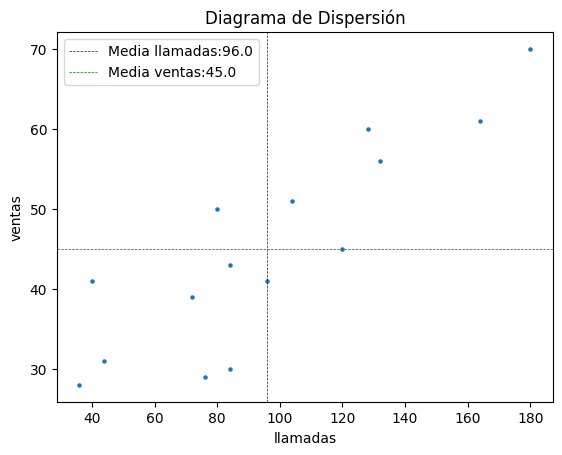

In [81]:
# Definir los datos
llamadas = np.array([96, 40, 104, 128, 164, 76, 72, 80, 36, 84, 180, 132, 120, 44, 84])
ventas = np.array([41, 41, 51, 60, 61, 29, 39, 50, 28, 43, 70, 56, 45, 31, 30])
# Crear un DataFrame de datos bivariados
datos = pd.DataFrame({'llamadas': llamadas, 'ventas': ventas})
print (datos)
f_dispersion(datos['llamadas'], datos['ventas'], "llamadas", "ventas")

### Crear datos de entrenamiento y datos de validaci√≥n

Primero se identifican las variable independiente X y la variable dependiente Y del conjunto origial de los datos.

Luego con la funcion *train_test_split(X, Y, test_size=0.3, random_state=2024)* se parten los datos en datos en dos, datos de entrenamiento y datos de validaci√≥n para cada variable, 70% para entrenamiento y 30% para validaci√≥n; el argumento *random_state=2024* significa semilla de aleatoriedad.





In [91]:
X = datos[['llamadas']].values  # Variable independiente
Y = datos['ventas'].values  # Variable dependiente

datos_entrenamiento, datos_validacion = f_entrena_test(X, Y, "Llamadas", "Ventas")


Datos de Entrenamiento:
   Llamadas  Ventas
0       104      51
1       128      60
2        44      31
3        40      41
4        80      50
5       164      61
6       120      45
7        96      41
8       180      70
9        36      28

Datos de Validaci√≥n:
   Llamadas  Ventas
0        84      43
1        72      39
2        84      30
3       132      56
4        76      29


### Crear modelo

Se manda llamar la funci√≥n *f_crear_model()* con los argumetos datos de engrnamiento ydatos e validaci√≥n para construir el modelo de regesion lineal simple.


In [83]:

modelo = f_crear_modelo(datos_entrenamiento)

Coeficiente a : 23.934151785714285
Coeficiente b : [0.24058315]


### Recta de regresi√≥n



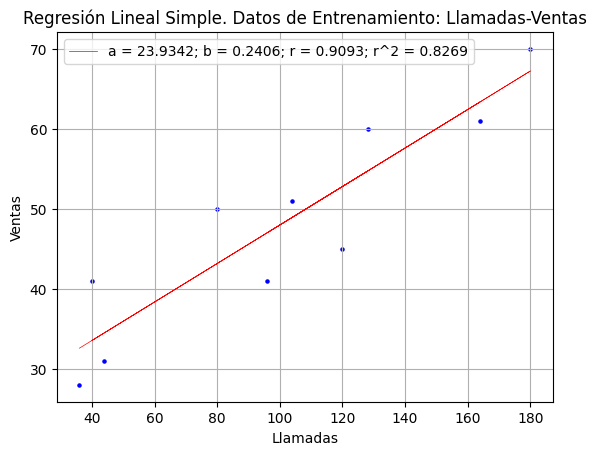

In [88]:
f_regresion_linea_tendencia(modelo, datos_entrenamiento, "Llamadas", "Ventas")


### Hacer prediciones

Con los datos de validaci√≥n se hacen las predicciones. Se manda llamar la funci√≥n *f_hacer_predicciones(modelo, datos_validacion)*.



In [85]:


predicciones = f_hacer_predicciones(modelo, datos_validacion)
print (predicciones)


   Llamadas  Valores Reales  Predicciones
0        84              43     44.143136
1        72              39     41.256138
2        84              30     44.143136
3       132              56     55.691127
4        76              29     42.218471


### Evaluar el modelo

El modelo se eval√∫a con la llamada de la funci√≥n



In [86]:

f_evaluar_modelo(predicciones)

R-squared: 0.21424443799951198
Root Mean Square Error (RMSE): 8.732108550431983


El estad√≠stico *R-squared* significa que el modelo con estos dados la variable independiente representa o explica un 21.42% a la variable dependiente, la m√©trica est√° por debajo del 50% inicialmente establecida

El estad√≠stico *Root Mean Square Error (RMSE)* signfica que el modelo se desv√≠a 8.77 o es el margen de error en las predicciones, estos estad√≠stios son o buenos o malos cuando se comparan con otros modelos.

## Datos de estaturas y pesos

Solo se describen las columnas 1 y 2 de los datos. La estatura de una presona va asociada con el peso corporal.

    obs  estaturas  pesos
0     1        178     79
1     2        172     75
2     3        160     62
3     4        192    107
4     5        167     72
5     6        170     52
6     7        185     90
7     8        175     70
8     9        180     85
9    10        170     92
10   11        180     87
11   12        180     82
12   13        170     75
13   14        183     90
14   15        161     65
15   16        150     56
16   17        162     56
17   18        177     82
18   19        190     95
19   20        165     70
20   21        164     80
21   22        183     92
22   23        175     74
23   24        168     65
24   25        170     77
25   26        175     72
26   27        175     65
27   28        178     70
28   29        170     75
29   30        160     65
30   31        162     60
31   32        166     67
32   33        178     75
33   34        170     70
34   35        163     60
35   36        165     72
36   37        170     76
37   38     

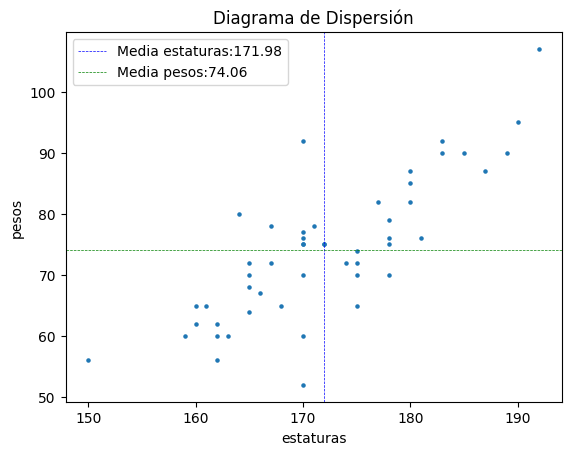

Datos de Entrenamiento:
    estaturas  pesos
0         172     75
1         170     77
2         170     70
3         174     72
4         167     72
5         165     70
6         170     52
7         159     60
8         171     78
9         165     64
10        164     80
11        185     90
12        170     92
13        168     65
14        190     95
15        175     74
16        175     70
17        162     62
18        170     75
19        180     82
20        166     67
21        178     76
22        162     60
23        167     78
24        189     90
25        160     62
26        180     87
27        165     72
28        172     75
29        170     60
30        170     76
31        178     70
32        178     79
33        178     75
34        180     85

Datos de Validaci√≥n:
    estaturas  pesos
0         175     72
1         177     82
2         181     76
3         165     68
4         170     75
5         192    107
6         183     90
7         175     65
8       

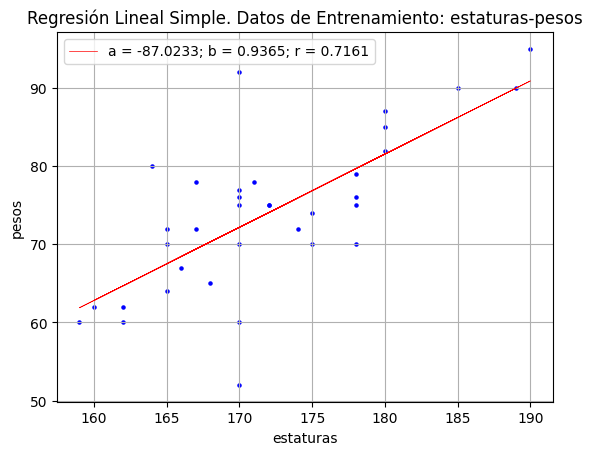

    estaturas  Valores Reales  Predicciones
0         175              72     76.857450
1         177              82     78.730372
2         181              76     82.476218
3         165              68     67.492837
4         170              75     72.175143
5         192             107     92.777292
6         183              90     84.349140
7         175              65     76.857450
8         162              56     64.683453
9         163              60     65.619914
10        150              56     53.445917
11        161              65     63.746991
12        183              92     84.349140
13        160              65     62.810530
14        187              87     88.094986
R-squared: 0.7892571456409354
Root Mean Square Error (RMSE): 6.526295719497343


In [104]:
# Cargar los datos
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/probabilidad-y-estad-stica/master/2024/datos/estaturas_pesos.csv")
datos.iloc[:, [1, 2]].describe()
print (datos)

# Diagrama de dispersi√≥n
f_dispersion(datos['estaturas'], datos['pesos'], "estaturas", "pesos")

# Datos de enrenamiento y validaci¬¥p
X = datos[['estaturas']].values  # Variable independiente
Y = datos['pesos'].values  # Variable dependiente

datos_entrenamiento, datos_validacion = f_entrena_test(X, Y, "estaturas", "pesos")

# Crear modelo
modelo = f_crear_modelo(datos_entrenamiento)

# Linea de tendencia
f_regresion_linea_tendencia(modelo, datos_entrenamiento, "estaturas", "pesos")

# Predicciones
predicciones = f_hacer_predicciones(modelo, datos_validacion)
print (predicciones)

# Evaluar el modelo
f_evaluar_modelo(predicciones)



## A√±os de experiencia y salario



     years_experience     salary
0                4.60   66228.63
1                6.05   82864.99
2                9.57  115587.22
3                6.37   86050.69
4                2.82   55510.70
..                ...        ...
495              3.43   59651.48
496             10.26  120788.10
497              3.79   61684.19
498              3.24   58560.85
499              2.06   44332.17

[500 rows x 2 columns]


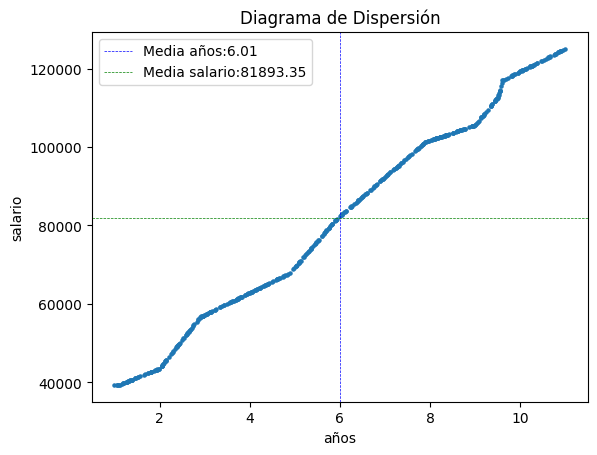

Datos de Entrenamiento:
     a√±os    salario
0    8.75  104601.94
1    5.68   78439.23
2    7.66   98951.26
3    2.05   44222.21
4    6.95   91855.06
..    ...        ...
345  3.06   57539.35
346  9.82  118264.86
347  5.37   74249.72
348  1.74   42294.68
349  6.99   92268.85

[350 rows x 2 columns]

Datos de Validaci√≥n:
      a√±os    salario
0     8.24  102630.68
1     2.50   50804.74
2     2.39   49151.29
3     8.59  103976.19
4     2.44   49867.83
..     ...        ...
145   6.01   82422.61
146   9.54  114393.23
147  10.46  121928.31
148   9.35  110479.54
149   6.95   91817.96

[150 rows x 2 columns]
Coeficiente a : 27692.614468753796
Coeficiente b : [9007.74452807]


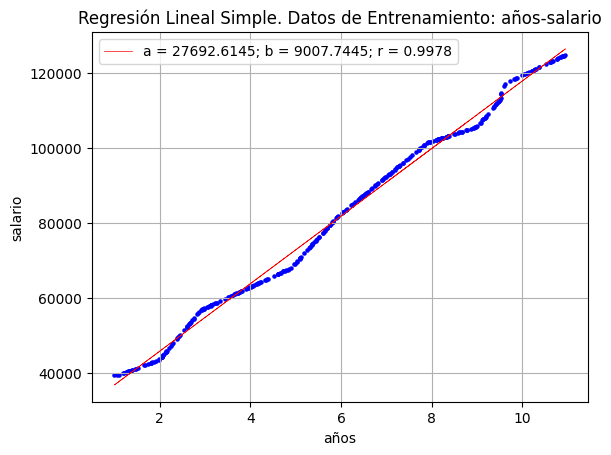

      a√±os  Valores Reales   Predicciones
0     8.24       102630.68  101916.429380
1     2.50        50804.74   50211.975789
2     2.39        49151.29   49221.123891
3     8.59       103976.19  105069.139965
4     2.44        49867.83   49671.511117
..     ...             ...            ...
145   6.01        82422.61   81829.159082
146   9.54       114393.23  113626.497267
147  10.46       121928.31  121913.622232
148   9.35       110479.54  111915.025806
149   6.95        91817.96   90296.438939

[150 rows x 3 columns]
R-squared: 0.9962220725536801
Root Mean Square Error (RMSE): 1632.2525260646908


In [109]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/probabilidad-y-estad-stica/master/2024/datos/agnios_ingresos.csv")
datos = np.round(datos, 2)
datos.describe()
print (datos)

# Diagrama de dispersi√≥n
f_dispersion(datos['years_experience'], datos['salary'], "a√±os", "salario")

# Datos de enrenamiento y validaci¬¥p
X = datos[['years_experience']].values  # Variable independiente
Y = datos['salary'].values  # Variable dependiente

datos_entrenamiento, datos_validacion = f_entrena_test(X, Y, "a√±os", "salario")

# Crear modelo
modelo = f_crear_modelo(datos_entrenamiento)

# Linea de tendencia
f_regresion_linea_tendencia(modelo, datos_entrenamiento, "a√±os", "salario")

# Predicciones
predicciones = f_hacer_predicciones(modelo, datos_validacion)
print (predicciones)

# Evaluar el modelo
f_evaluar_modelo(predicciones)


# Interpretaci√≥n

* Con los datos de llamadas y ventas se generan los estad√≠sticos sigientes: R-squared: 0.21
Root Mean Square Error (RMSE): 8.7321 que significa que el modelo es eficiente al 21% aproximadamente y que su margen de error media es 8.73.

* Con los datos de estaturas y pesos, los etad√≠sticos resultantes fueron: R-squared: 0.78
Root Mean Square Error (RMSE): 6.5262. significa que el modelo de regresi√≥n lineal simple la variable independiente llamadas explica un 78% aproximadamente a la variable dependiente ventas. Su margen de error medio var√≠a con 6.5262. El modelo es eficiente con estos datos por encima de la m√©trica del 50% establecida inicialmente.

* Con los datos de a√±os de experiencia y salario, los estad√≠sticos para evaluaci√≥n fueron: *R-squared: 0.99* y *Root Mean Square Error (RMSE): 1632.2525*. Significa que el modelo la variable independiente a√±os de experiencia representa un 99% a la variable salario y que el modelo tiene un margen de error en las prediccione de 1632.25 aproximadamente.

* Hay otros datos ....





# Bibliograf√≠a

* Amat Rodrigo, Joaqu√≠n. 2016. ‚ÄúCorrelaci√≥n Lineal y Regresi√≥n Lineal Simple.‚Äù 2016. https://www.cienciadedatos.net/documentos/24_correlacion_y_regresion_lineal.
* OpenAI. (2024, Mayo 28). Respuesta generada por ChatGPT [Respuesta a consulta]. Obtenido de https://www.openai.com/chatgpt
* Hern√°ndez Sampieri, Roberto, Carlos Fern√°ndez Collado, and Mar√≠a del Pilar Baptista Lucio. 2014. Metodolog√≠a de La Investigaci√≥n. Sexta.
* Lind, Douglas, William Marchal, and Samuel Wathen. 2015. Estad√≠stica Aplicada a Los Negocios y La Econom√≠a. Decimo Sexta. M√©xico, D.F.: McGraw-Hill.
* Walpole, Ronald E., Raymond H. Myers, and Sharon L. Myers. 2012. Probabilidad y Estad√≠stica Para Ingenier√≠a y Ciencias. Novena Edici√≥n. M√©xico: Pearson.
* Walpole, Ronald E., Raymond H. Myers, Sharon L. Myers, and Keying Ye. 2007. Probabilidad y Estad√≠stica Para Ingenier√≠a y Ciencias. Octava Edici√≥n. M√©xico: Pearson Education.